Original Columns: ['Company_Names', 'Cars_Names', 'Engines', 'CCBattery_Capacity', 'HorsePower', 'Total_Speed', 'Performance0__100_KMH', 'Cars_Prices', 'Fuel_Types', 'Seats', 'Torque']


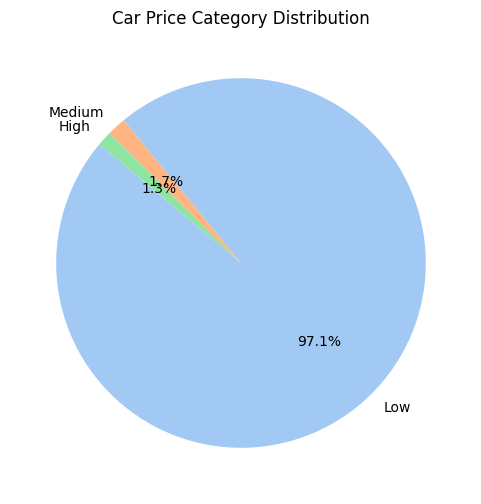

Mean Squared Error: 25211972023.85
R-squared (Accuracy): 62.00%
Coefficients: [ 4.27424831e-03 -3.12566583e+04 -2.66063903e+04 -9.85915373e+03
 -5.02033508e-05  1.40711931e+04 -5.29395411e+03 -1.03991998e+04
  1.05934435e+05 -6.05292990e+04  1.91168475e+04 -6.79260616e+04
  3.28528768e+03  9.52679664e-04  3.09342053e-04  5.48175412e+03
  2.22783786e+04  5.72283019e+03  1.11624595e+04 -1.09412317e+04
 -3.26805360e+03 -7.26543124e+03 -5.31707541e-04  2.95893260e+04
  3.80906607e+02  1.56441542e+04  1.87953814e+04 -5.33219816e-03
 -1.27189804e-03  2.13259190e+04  1.68925119e+03  1.21819065e+04
  1.45326353e+04 -2.35889335e+04 -4.75286064e-03 -1.69219002e-03
 -2.05392643e+04 -8.43146592e+03 -2.01115297e+04  4.80709416e+04
  6.09647933e+03  8.46665805e+03  3.74822813e+03  6.23077352e-03
  1.52275427e+04 -3.83009197e+04 -2.45611435e+04 -2.32579294e-03
 -5.31217320e+04  1.66612598e+04  6.25224147e+04  1.82281824e+04
  3.30427639e+04 -4.64431885e+03 -4.28235244e+04 -5.12195914e-03
  4.51733559

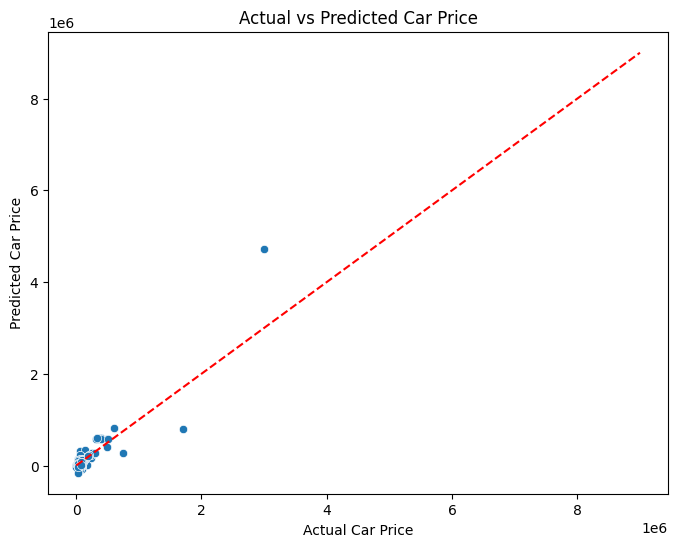

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = '/content/cars_dataset.csv.csv'
df = pd.read_csv(dataset_path, encoding='latin1')

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(r'[^\w_]', '', regex=True)

# Display original columns
print("Original Columns:", df.columns.tolist())

# Rename columns if they exist
df = df.rename(columns={
    'Cars_Names': 'Car_Name',
    'CCBattery_Capacity': 'CC',
    'HorsePow': 'HorsePower',
    'Total_Speed': 'Top_Speed',
    'Performance0__100_KMH': 'Acceleration_0_100',
    'Cars_Prices': 'Price',
    'Fuel_Types': 'Fuel_Type',
    'Engines': 'Engine'
})

# Ensure all expected columns exist
expected_columns = ['Price', 'CC', 'HorsePower', 'Top_Speed', 'Acceleration_0_100', 'Engine', 'Seats']
missing = [col for col in expected_columns if col not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}")

# Clean and convert 'Price'
df['Price'] = df['Price'].astype(str).str.replace('[$,₹]', '', regex=True)
df['Price'] = df['Price'].apply(lambda x: x.split('–')[0].strip())  # Handle price ranges
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Clean and convert 'CC'
df['CC'] = df['CC'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['CC'] = pd.to_numeric(df['CC'], errors='coerce')

# Clean and convert 'HorsePower'
df['HorsePower'] = df['HorsePower'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['HorsePower'] = pd.to_numeric(df['HorsePower'], errors='coerce')

# Clean and convert 'Top_Speed'
df['Top_Speed'] = df['Top_Speed'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Top_Speed'] = pd.to_numeric(df['Top_Speed'], errors='coerce')

# Clean and convert 'Acceleration_0_100'
df['Acceleration_0_100'] = df['Acceleration_0_100'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Acceleration_0_100'] = pd.to_numeric(df['Acceleration_0_100'], errors='coerce')

# Clean and convert 'Seats'
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')

# Drop rows with missing values in required columns
df = df.dropna(subset=['Price', 'CC', 'HorsePower', 'Top_Speed', 'Acceleration_0_100', 'Seats'])

# Handle categorical 'Engine' column with one-hot encoding
df = pd.get_dummies(df, columns=['Engine'], drop_first=True)

# Prepare feature list
feature_columns = [col for col in df.columns if col.startswith('Engine_')]
feature_columns += ['CC', 'HorsePower', 'Top_Speed', 'Acceleration_0_100', 'Seats']

# Optional: remove outliers (e.g., price > 1 crore)
df = df[df['Price'] < 1e7]

# Create price categories for visualization
def price_category(price):
    if price < 500000:
        return 'Low'
    elif price < 1500000:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Price'].apply(price_category)

# Pie chart of price categories
plt.figure(figsize=(6,6))
price_counts = df['Price_Category'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Car Price Category Distribution')
plt.show()

# Prepare data
X = df[feature_columns]
y = df['Price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (Accuracy): {r2 * 100:.2f}%")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Car Price')
plt.show()

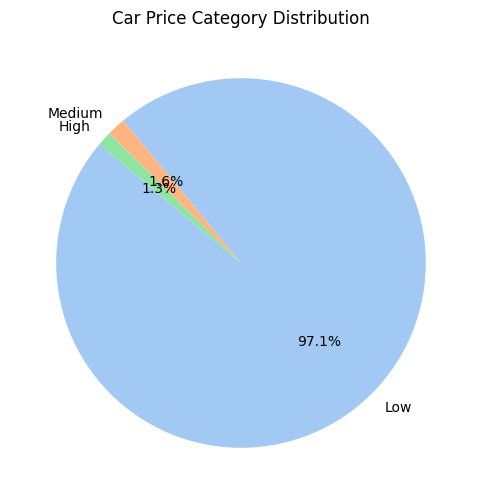


Random Forest Model Accuracy: 99.04%

Classification Report:
              precision    recall  f1-score   support

         Low       0.99      1.00      1.00       202
      Medium       1.00      0.67      0.80         3
        High       1.00      0.67      0.80         3

    accuracy                           0.99       208
   macro avg       1.00      0.78      0.87       208
weighted avg       0.99      0.99      0.99       208



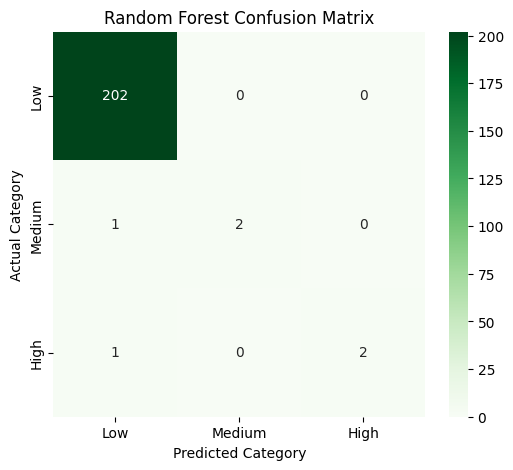

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
dataset_path = '/content/cars_dataset.csv.csv'  # Adjust filename as needed
df = pd.read_csv(dataset_path, encoding='latin1')

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(r'[^\w_]', '', regex=True)

# Rename columns
df = df.rename(columns={
    'Company_Names': 'Company',
    'Cars_Names': 'Car_Name',
    'CCBattery_Capacity': 'CC',
    'HorsePow': 'HorsePower',
    'Total_Speed': 'Top_Speed',
    'Performance0__100_KMH': 'Acceleration_0_100', # Corrected column name
    'Cars_Prices': 'Price',
    'Fuel_Types': 'Fuel_Type',
    'Engines': 'Engine'
})

# Clean and convert Price column
df['Price'] = df['Price'].astype(str).str.replace(r'[^0-9.–]', '', regex=True)
df['Price'] = df['Price'].apply(lambda x: x.split('–')[0].strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Clean numeric columns
def clean_numeric(col, keep_decimal=False):
    regex = r'[^0-9.]' if keep_decimal else r'[^0-9]'
    return pd.to_numeric(
        df[col].astype(str).str.replace(regex, '', regex=True),
        errors='coerce'
    )

df['CC'] = clean_numeric('CC')
df['HorsePower'] = clean_numeric('HorsePower')
df['Top_Speed'] = clean_numeric('Top_Speed')
df['Acceleration_0_100'] = clean_numeric('Acceleration_0_100', keep_decimal=True)
df['Seats'] = clean_numeric('Seats')

# Drop rows with missing required values
required_cols = ['Price', 'CC', 'HorsePower', 'Top_Speed', 'Acceleration_0_100', 'Seats']
df = df.dropna(subset=required_cols)

# Optional filter for price extremes
df = df[df['Price'] < 1e7]

# Create price categories
def price_category(price):
    if price < 500000:
        return 'Low'
    elif price < 1500000:
        return 'Medium'
    else:
        return 'High'

df['Price_Category'] = df['Price'].apply(price_category)
category_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Price_Label'] = df['Price_Category'].map(category_map)

# Visualize class distribution
plt.figure(figsize=(6,6))
price_counts = df['Price_Category'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Car Price Category Distribution')
plt.show()

# Features and one-hot encoding for categorical 'Engine' column
feature_columns = ['CC', 'HorsePower', 'Top_Speed', 'Acceleration_0_100', 'Seats']
df = pd.get_dummies(df, columns=['Engine'], drop_first=True)
feature_columns += [col for col in df.columns if col.startswith('Engine_')]

X = df[feature_columns]
y = df['Price_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Model Accuracy: {accuracy * 100:.2f}%\n")

unique_labels = np.unique(np.concatenate((y_test, y_pred)))
report_target_names = [name for val, name in sorted([(v, k) for k, v in category_map.items()]) if val in unique_labels]

print("Classification Report:")
print(classification_report(y_test, y_pred, labels=unique_labels, target_names=report_target_names))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=report_target_names,
            yticklabels=report_target_names)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Random Forest Confusion Matrix')
plt.show()